# Build a Simple Linear Regression Model and Make Predictions

In [1]:
#Supress Warnings
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Importing naumpy and pandas libraries to read the data

import numpy as np
import pandas as pd

# Steps for Building a Simple Linear Regression Model:                                                             
1 Loading and Understanding the dataset  
2 Visualizing the dataset  
3 Performing Simple Linear Regression (SLR)  
4 Residual Analysis  
5 Predictions on the test dataset

# 1 Loading and Understanding the Dataset

In [3]:

advertising = pd.read_csv("sales_advertisement.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Note: In this dataset, we have three columns as Independent Variables TV, Radio and Newpapers and a Depdenent Variable column "Sales"

In [4]:
# Shape of our dataset
advertising.shape

(200, 4)

In [5]:
# Info our dataset
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# Describe our dataset
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# 2 Visualizing the Dataset

In [7]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

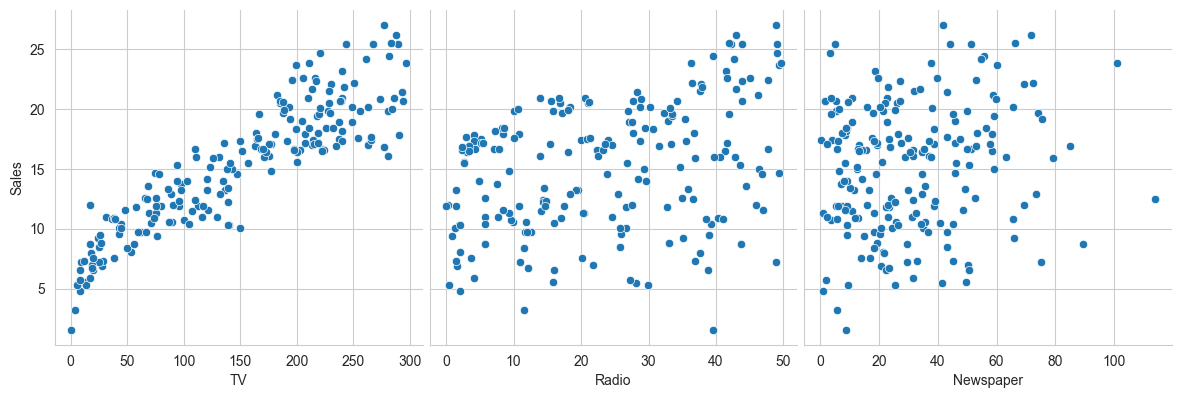

In [8]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

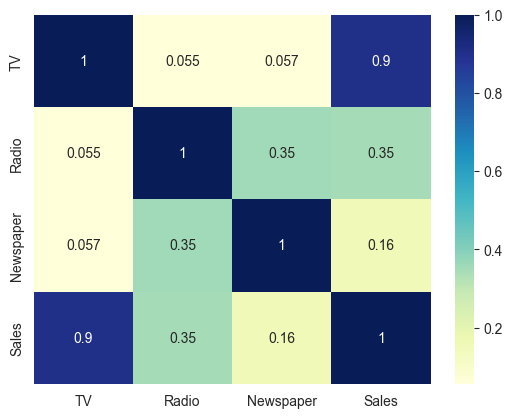

In [9]:
# Visualizing the data using heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

# 3 Performing Simple Linear Regression (for "TV" Independent Variable because the TV column seems most correlated to Sales Depdent Variable.)
Equation of simple linear regression: y = mX + b

In our case:
y = m * TV + b

Perform simple linear regression in four steps:
A) Create/Separate X (Independent Variable) and y (Dependent/Target Variable)
B) Create/Split Training and Test datasets from the Original Dataset
C) Build/Train the SLR Model
D) Test/Evaluate the SLR Model

# A) Create/Separate X (Independent Variable) and y (Dependent/Target Variable)

In [10]:

# we will assign our Independent Variable/Column TV as X and our Dependent/Target Variable Sales as y.
# X = Independent Variable = TV and y = Dependent/Target Variable = Sales

# Creating X and y
X = advertising['TV']
y = advertising['Sales']

# B) Create/Split Training and Test Datasets from the Original Dataset

In [11]:


# Splitting the Varaibles as Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [12]:
# Take a look at the Training Dataset
X_train
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [13]:
# Take a look at the Test Dataset (which will be used for Evaluation/Prediction)
X_test
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64

# C) Build/Train the SLR Model
Using the following two packages, we can build a Simple Linear Regression (SLR) model:
statsmodel 
sklearn

In [14]:
# First, we are building SLR Model using statsmodel package

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

In [15]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [16]:
# Once we’ve added constant, we can fit the regression line using OLS (Ordinary Least Square) method present in the statsmodel. 
# After that, we will see the parameters, i.e., b and m of the straight line.

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters (Intercept "b"=6.94 and Slope "m"=0.054 of the line)
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [17]:
# Performing a summary to list out all the different parameters of the regression line fitted
#  like R², probability of F-statistic, and p-value.
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           1.52e-52
Time:                        11:41:25   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# D) Summary Analysis of Trained Model
So, the statistics we are mainly concerned with to determine whether the model is viable or not are:

1. The coefficients and its p-value(significance) 
2. R-squared value 
3. F-statistic and its significance

---------------------
1. The p values in regression help determine whether the relationships that you observe in your sample also exist in the larger population. The linear regression p value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable.

1. The coefficient for TV is 0.054, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
We have to make sure that the p-value should always be less for the coefficient to be significant


--------------------
2. R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

2. R-squared value is 0.816, which means that 81.6% of the Sales variance can be explained by the TV column using this line.

-------------------
3. f-statistics is a statistic used to test the significance of regression coefficients in linear regression models. f-statistics can be calculated as MSR/MSE where MSR represents the mean sum of squares regression and MSE represents the mean sum of squares error.

3. Prob F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.

Since the fit is significant, let’s go ahead and visualize how well the straight-line fits the scatter plot between TV and Sales columns.

From the parameters, we got the values of the intercept and the slope for the straight line. The equation of the line is,

Sales =  0.054 * TV + 6.948  (y = mX + b)

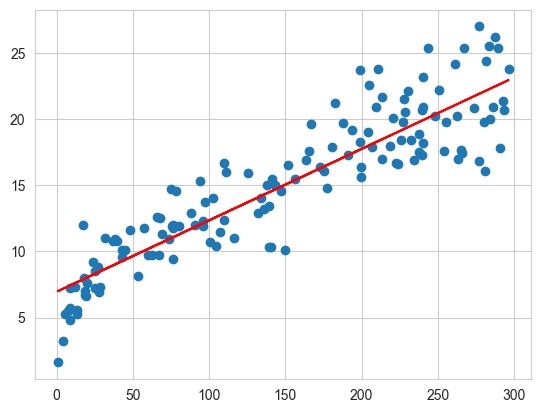

In [18]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

Training Model of Regression is Built
This is how we build a simple linear regression model using training data. Now before evaluating the model on test data, we have to perform residual analysis.

# 4 Residual Analysis
One of the major assumptions of the linear regression model is the error terms are normally distributed.

Error = Actual y value - y predicted value

A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.

Now from the dataset, We have to predict the y value from the training dataset of X using the predict attribute. After that, we’ll create the error terms(Residuals) from the predicted data.

In [19]:
# Predicting y_value using training dataset of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train dataset and predicted y_data
res = (y_train - y_train_pred)

/var/folders/16/zl7d3r5d0bn7chmwxr_cr8tm0000gn/T/ipykernel_6984/265954508.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


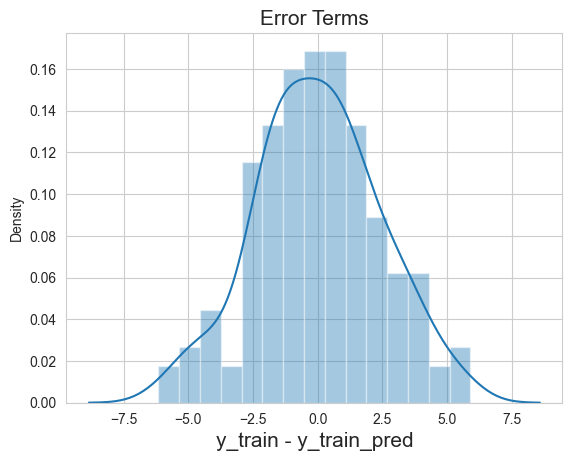

In [20]:
# Now, let’s plot the histogram of the residuals and see whether it looks like normal distribution or not.

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

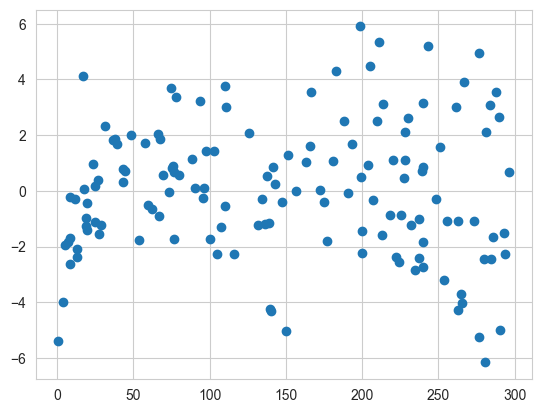

In [21]:
# As we can see, the residuals are following the normal distribution graph with a mean 0.
# Now, make sure that the residuals are not following any specific pattern.

# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()


Since the Residuals follow a normal distribution and do not follow any specific pattern, we can use the linear regression model we have built to evaluate test data.

# 5 Test/Evaluate the SLR Model/Predictions on the Test data

Now that we have fitted the regression line on our train dataset, we can make some predictions to the test data. 
Similar to the training dataset, we have to add_constant to the test data and predict the y values using the predict attribute present in the statsmodel.

In [22]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the predicted values
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [23]:
# Calculate the R² value for the above-predicted y-values.
# We can do that by merely importing the r2_score library from sklearn.metrics package.


# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7921031601245658

The R² value by using the above code = 0.792

If we can remember from the training data, the R² value = 0.815

Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.

Let’s visualize the line on the test data.

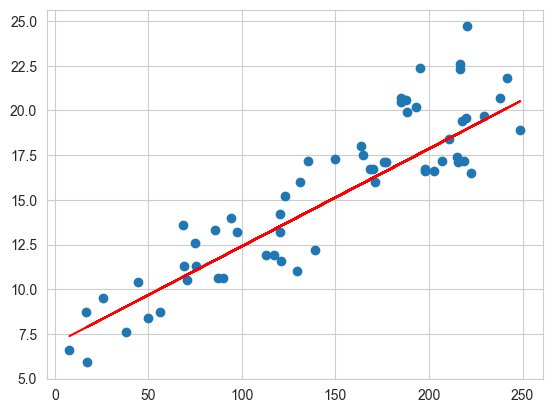

In [24]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

The scatter-plot with best-fit line looks like, This is how we build a linear regression model using the "statsmodel" package.

# Method 2: Simple Linear Regression Model Using sklearn package/library

Apart from the statsmodel, we can build a linear regression model using sklearn. Using the linear_model library from sklearn, we can make the model.

Similar to statsmodel, we’ll split the data into train and test.

In [25]:
# Splitting the data into Training and Testing Datasets
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [26]:
# For simple linear regression, we need to add a column to perform the regression fit properly.

# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [27]:
# Now, let’s fit the line to the plot importing the LinearRegression library from the sklearn.linear_model.

from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [28]:
# Now, let’s find the Coefficients (Intercept and Slope) of the model.

# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


The straight-line equation we get for the above values is, Sales =  0.054 * TV + 6.948 
If we observe, the equation we got here is the same as the one we got in the statsmodel.

# 5 Prediction and Evaluation
After that, we’ll make the predictions and on the data and evaluate the model by comparing the R² values.

In [29]:
# Prediction of y_value usng Trained LR Model
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [30]:
# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480389
0.7921031601245662


The R² values of the train and test data are R² train_data = 0.816 R² test_data = 0.792

Same as the statesmodel, the R² value on test data is within 5% of the R² value on training data. We can apply the model to the unseen test set in the future.

Conclusion As we have seen, we can build a linear regression model using either a statsmodel or sklearn.

We have to make sure to follow these five steps to build the simple linear regression model:

Reading and understanding the data 
Visualizing the data 
Performing simple linear regression 
Residual analysis 
Predictions on the test set

Next is Multiple Linear Regression (MLR) Model

# 3 Performing Simple Linear Regression (for "TV" Independent Variable because the TV column seems most correlated to Sales Depdent Variable.)
Equation of simple linear regression: y = mX + b

In our case:
y = m * TV + b

Perform simple linear regression in four steps:
A) Create/Separate X (Independent Variable) and y (Dependent/Target Variable)
B) Create/Split Training and Test datasets from the Original Dataset
C) Build/Train the SLR Model
D) Test/Evaluate the SLR Model

# A) Create/Separate X (Independent Variable) and y (Dependent/Target Variable)

In [31]:

# we will assign our Independent Variable/Column TV as X and our Dependent/Target Variable Sales as y.
# X = Independent Variable = TV and y = Dependent/Target Variable = Sales

# Creating X and y
X = advertising['Radio']
y = advertising['Sales']

# B) Create/Split Training and Test Datasets from the Original Dataset

In [32]:


# Splitting the Varaibles as Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [33]:
# Take a look at the Training Dataset
X_train
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [34]:
# Take a look at the Test Dataset (which will be used for Evaluation/Prediction)
X_test
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64

# C) Build/Train the SLR Model
Using the following two packages, we can build a Simple Linear Regression (SLR) model:
statsmodel 
sklearn

In [35]:
# First, we are building SLR Model using statsmodel package

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

In [36]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [37]:
# Once we’ve added constant, we can fit the regression line using OLS (Ordinary Least Square) method present in the statsmodel. 
# After that, we will see the parameters, i.e., b and m of the straight line.

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters (Intercept "b"=6.94 and Slope "m"=0.054 of the line)
lr.params

const    12.164674
Radio     0.123920
dtype: float64

In [38]:
# Performing a summary to list out all the different parameters of the regression line fitted
#  like R², probability of F-statistic, and p-value.
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     17.38
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           5.36e-05
Time:                        11:41:38   Log-Likelihood:                -431.24
No. Observations:                 140   AIC:                             866.5
Df Residuals:                     138   BIC:                             872.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1647      0.816     14.914      0.000      10.552      13.777
Radio          0.1239      0.030      4.169      0.000       0.065       0.183
==============================================================================
Omnibus:                        9.946   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.526
Skew:                          -0.384   Prob(JB):                       0.0383
Kurtosis:                       2.273   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# D) Summary Analysis of Trained Model
So, the statistics we are mainly concerned with to determine whether the model is viable or not are:

1. The coefficients and its p-value(significance) 
2. R-squared value 
3. F-statistic and its significance

---------------------
1. The p values in regression help determine whether the relationships that you observe in your sample also exist in the larger population. The linear regression p value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable.

1. The coefficient for TV is 0.054, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
We have to make sure that the p-value should always be less for the coefficient to be significant


--------------------
2. R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

2. R-squared value is 0.816, which means that 81.6% of the Sales variance can be explained by the TV column using this line.

-------------------
3. f-statistics is a statistic used to test the significance of regression coefficients in linear regression models. f-statistics can be calculated as MSR/MSE where MSR represents the mean sum of squares regression and MSE represents the mean sum of squares error.

3. Prob F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.

Since the fit is significant, let’s go ahead and visualize how well the straight-line fits the scatter plot between TV and Sales columns.

From the parameters, we got the values of the intercept and the slope for the straight line. The equation of the line is,

Sales =  0.054 * TV + 6.948  (y = mX + b)

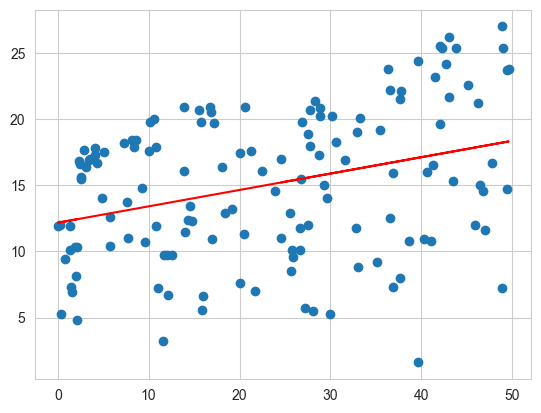

In [39]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 12.164 + 0.1239*X_train, 'r')
plt.show()

Training Model of Regression is Built
This is how we build a simple linear regression model using training data. Now before evaluating the model on test data, we have to perform residual analysis.

# 4 Residual Analysis
One of the major assumptions of the linear regression model is the error terms are normally distributed.

Error = Actual y value - y predicted value

A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.

Now from the dataset, We have to predict the y value from the training dataset of X using the predict attribute. After that, we’ll create the error terms(Residuals) from the predicted data.

In [40]:
# Predicting y_value using training dataset of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train dataset and predicted y_data
res = (y_train - y_train_pred)

/var/folders/16/zl7d3r5d0bn7chmwxr_cr8tm0000gn/T/ipykernel_6984/265954508.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


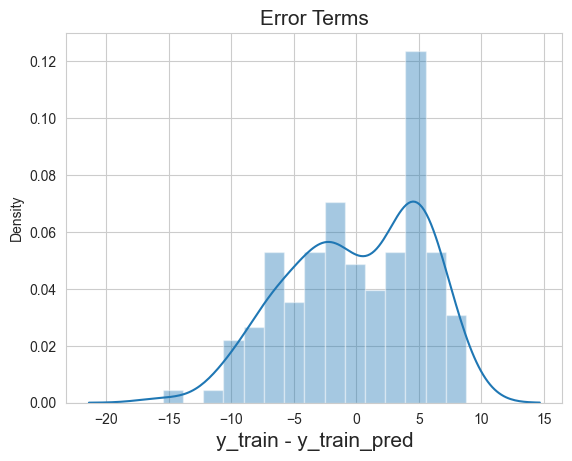

In [41]:
# Now, let’s plot the histogram of the residuals and see whether it looks like normal distribution or not.

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

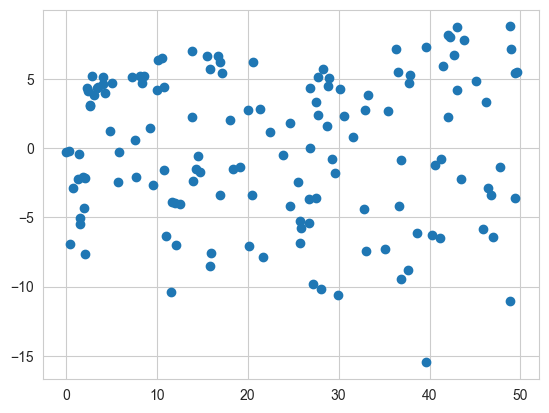

In [42]:
# As we can see, the residuals are following the normal distribution graph with a mean 0.
# Now, make sure that the residuals are not following any specific pattern.

# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()


Since the Residuals follow a normal distribution and do not follow any specific pattern, we can use the linear regression model we have built to evaluate test data.

# 5 Test/Evaluate the SLR Model/Predictions on the Test data

Now that we have fitted the regression line on our train dataset, we can make some predictions to the test data. 
Similar to the training dataset, we have to add_constant to the test data and predict the y values using the predict attribute present in the statsmodel.

In [43]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the predicted values
y_test_pred

126    16.985157
104    16.415126
99     17.332133
92     16.315990
111    16.873629
167    12.809058
116    13.936728
96     12.598394
52     17.332133
69     17.604756
164    13.986296
124    16.167286
182    12.871018
154    14.779383
125    13.626929
196    12.771882
194    16.576222
177    13.131249
163    16.724925
31     14.320880
11     15.138751
73     12.871018
15     18.075652
41     16.303598
97     14.766992
128    18.236748
133    16.315990
82     14.680248
139    17.604756
123    16.452302
83     17.679108
65     13.317129
151    13.205601
162    14.407624
170    13.602145
77     15.696391
32     12.350554
173    13.044505
174    12.586002
85     14.444800
168    15.089183
112    14.073040
171    14.754600
181    12.833842
7      14.593504
46     13.391481
75     17.579973
28     15.522903
29     14.147392
195    12.623178
40     14.928087
153    17.084293
115    16.501870
64     17.468445
59     15.820310
1      17.034725
192    12.672746
136    16.997549
152    15.0520

In [44]:
# Calculate the R² value for the above-predicted y-values.
# We can do that by merely importing the r2_score library from sklearn.metrics package.


# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.1541334154583961

The R² value by using the above code = 0.792

If we can remember from the training data, the R² value = 0.815

Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.

Let’s visualize the line on the test data.

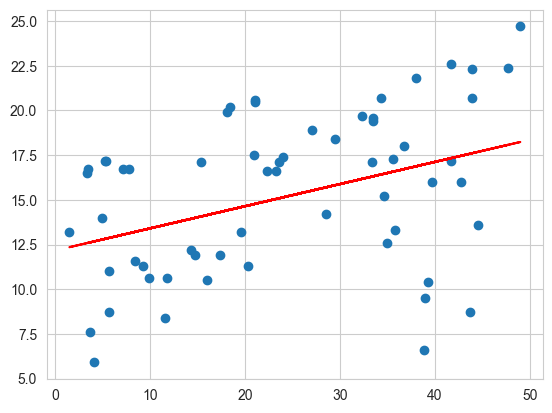

In [45]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

The scatter-plot with best-fit line looks like, This is how we build a linear regression model using the "statsmodel" package.

# Method 2: Simple Linear Regression Model Using sklearn package/library

Apart from the statsmodel, we can build a linear regression model using sklearn. Using the linear_model library from sklearn, we can make the model.

Similar to statsmodel, we’ll split the data into train and test.

In [46]:
# Splitting the data into Training and Testing Datasets
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [47]:
# For simple linear regression, we need to add a column to perform the regression fit properly.

# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [48]:
# Now, let’s fit the line to the plot importing the LinearRegression library from the sklearn.linear_model.

from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [49]:
# Now, let’s find the Coefficients (Intercept and Slope) of the model.

# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 12.164674278168622
Slope : [0.12391987]


The straight-line equation we get for the above values is, Sales =  0.054 * TV + 6.948 
If we observe, the equation we got here is the same as the one we got in the statsmodel.

# 5 Prediction and Evaluation
After that, we’ll make the predictions and on the data and evaluate the model by comparing the R² values.

In [50]:
# Prediction of y_value usng Trained LR Model
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [51]:
# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.11188119510677019
0.15413341545839598


The R² values of the train and test data are R² train_data = 0.816 R² test_data = 0.792

Same as the statesmodel, the R² value on test data is within 5% of the R² value on training data. We can apply the model to the unseen test set in the future.

Conclusion As we have seen, we can build a linear regression model using either a statsmodel or sklearn.

We have to make sure to follow these five steps to build the simple linear regression model:

Reading and understanding the data 
Visualizing the data 
Performing simple linear regression 
Residual analysis 
Predictions on the test set

Next is Multiple Linear Regression (MLR) Model

# 3 Performing Simple Linear Regression (for "TV" Independent Variable because the TV column seems most correlated to Sales Depdent Variable.)
Equation of simple linear regression: y = mX + b

In our case:
y = m * TV + b

Perform simple linear regression in four steps:
A) Create/Separate X (Independent Variable) and y (Dependent/Target Variable)
B) Create/Split Training and Test datasets from the Original Dataset
C) Build/Train the SLR Model
D) Test/Evaluate the SLR Model

# A) Create/Separate X (Independent Variable) and y (Dependent/Target Variable)

In [52]:

# we will assign our Independent Variable/Column TV as X and our Dependent/Target Variable Sales as y.
# X = Independent Variable = TV and y = Dependent/Target Variable = Sales

# Creating X and y
X = advertising['Newspaper']
y = advertising['Sales']

# B) Create/Split Training and Test Datasets from the Original Dataset

In [53]:


# Splitting the Varaibles as Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [54]:
# Take a look at the Training Dataset
X_train
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [55]:
# Take a look at the Test Dataset (which will be used for Evaluation/Prediction)
X_test
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64

# C) Build/Train the SLR Model
Using the following two packages, we can build a Simple Linear Regression (SLR) model:
statsmodel 
sklearn

In [56]:
# First, we are building SLR Model using statsmodel package

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

In [57]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [58]:
# Once we’ve added constant, we can fit the regression line using OLS (Ordinary Least Square) method present in the statsmodel. 
# After that, we will see the parameters, i.e., b and m of the straight line.

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters (Intercept "b"=6.94 and Slope "m"=0.054 of the line)
lr.params

const        13.132714
Newspaper     0.059574
dtype: float64

In [59]:
# Performing a summary to list out all the different parameters of the regression line fitted
#  like R², probability of F-statistic, and p-value.
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.461
Date:                Fri, 13 Sep 2024   Prob (F-statistic):            0.00423
Time:                        11:41:45   Log-Likelihood:                -435.38
No. Observations:                 140   AIC:                             874.8
Df Residuals:                     138   BIC:                             880.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1327      0.792     16.574      0.000      11.566      14.699
Newspaper      0.0596      0.020      2.909      0.004       0.019       0.100
==============================================================================
Omnibus:                        9.229   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                3.890
Skew:                          -0.073   Prob(JB):                        0.143
Kurtosis:                       2.196   Cond. No.                         66.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# D) Summary Analysis of Trained Model
So, the statistics we are mainly concerned with to determine whether the model is viable or not are:

1. The coefficients and its p-value(significance) 
2. R-squared value 
3. F-statistic and its significance

---------------------
1. The p values in regression help determine whether the relationships that you observe in your sample also exist in the larger population. The linear regression p value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable.

1. The coefficient for TV is 0.054, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
We have to make sure that the p-value should always be less for the coefficient to be significant


--------------------
2. R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

2. R-squared value is 0.816, which means that 81.6% of the Sales variance can be explained by the TV column using this line.

-------------------
3. f-statistics is a statistic used to test the significance of regression coefficients in linear regression models. f-statistics can be calculated as MSR/MSE where MSR represents the mean sum of squares regression and MSE represents the mean sum of squares error.

3. Prob F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.

Since the fit is significant, let’s go ahead and visualize how well the straight-line fits the scatter plot between TV and Sales columns.

From the parameters, we got the values of the intercept and the slope for the straight line. The equation of the line is,

Sales =  0.054 * TV + 6.948  (y = mX + b)

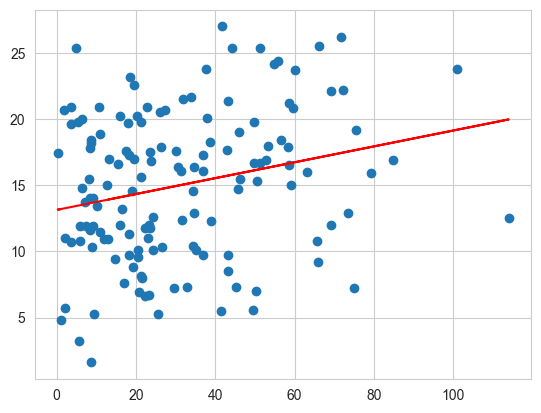

In [60]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 13.133 + 0.060*X_train, 'r')
plt.show()

Training Model of Regression is Built
This is how we build a simple linear regression model using training data. Now before evaluating the model on test data, we have to perform residual analysis.

# 4 Residual Analysis
One of the major assumptions of the linear regression model is the error terms are normally distributed.

Error = Actual y value - y predicted value

A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.

Now from the dataset, We have to predict the y value from the training dataset of X using the predict attribute. After that, we’ll create the error terms(Residuals) from the predicted data.

In [61]:
# Predicting y_value using training dataset of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train dataset and predicted y_data
res = (y_train - y_train_pred)

/var/folders/16/zl7d3r5d0bn7chmwxr_cr8tm0000gn/T/ipykernel_6984/265954508.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


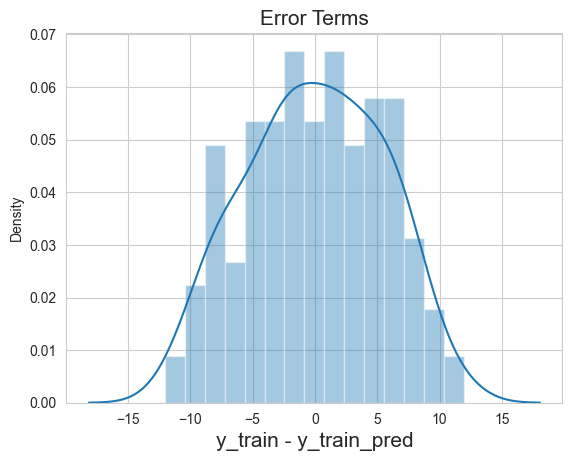

In [62]:
# Now, let’s plot the histogram of the residuals and see whether it looks like normal distribution or not.

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

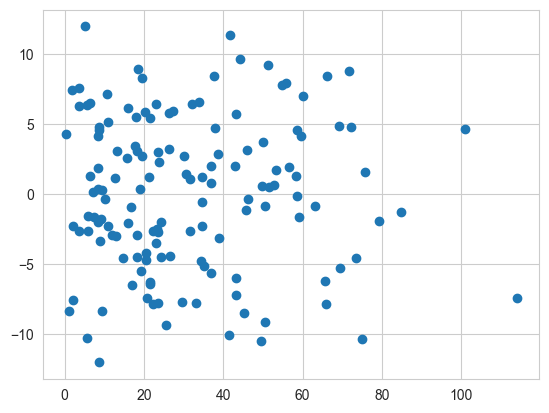

In [63]:
# As we can see, the residuals are following the normal distribution graph with a mean 0.
# Now, make sure that the residuals are not following any specific pattern.

# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()


Since the Residuals follow a normal distribution and do not follow any specific pattern, we can use the linear regression model we have built to evaluate test data.

# 5 Test/Evaluate the SLR Model/Predictions on the Test data

Now that we have fitted the regression line on our train dataset, we can make some predictions to the test data. 
Similar to the training dataset, we have to add_constant to the test data and predict the y values using the predict attribute present in the statsmodel.

In [64]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the predicted values
y_test_pred

126    16.147148
104    13.448455
99     15.867151
92     16.647568
111    14.514826
167    14.288446
116    14.657803
96     13.484199
52     15.491836
69     14.753121
164    13.454413
124    17.553090
182    14.902056
154    13.698665
125    14.675675
196    13.615262
194    13.490157
177    15.229712
163    13.573560
31     15.432263
11     13.371009
73     14.997374
15     16.284168
41     15.438220
97     14.443338
128    13.323350
133    15.819492
82     15.068863
139    13.233990
123    13.871429
83     15.253541
65     13.186330
151    16.033958
162    14.657803
170    14.228872
77     13.978662
32     14.919928
173    13.895259
174    13.913131
85     17.046713
168    16.564165
112    13.275691
171    15.956512
181    14.765036
7      13.823770
46     15.259499
75     18.458612
28     14.496954
29     15.563325
195    13.954832
40     15.015246
153    15.378646
115    16.272253
64     14.854397
59     13.686750
1      15.819492
192    15.015246
136    13.686750
152    13.9786

In [65]:
# Calculate the R² value for the above-predicted y-values.
# We can do that by merely importing the r2_score library from sklearn.metrics package.


# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

-0.14457363289935854

The R² value by using the above code = 0.792

If we can remember from the training data, the R² value = 0.815

Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.

Let’s visualize the line on the test data.

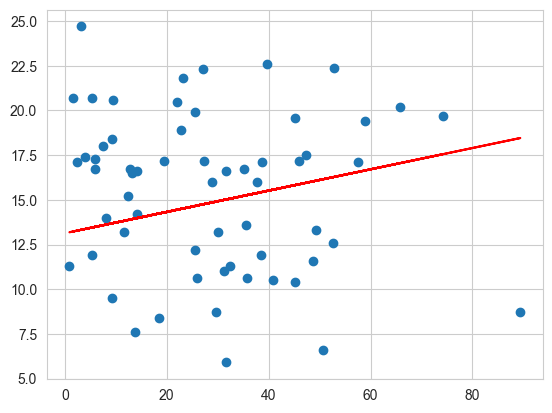

In [66]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

The scatter-plot with best-fit line looks like, This is how we build a linear regression model using the "statsmodel" package.

# Method 2: Simple Linear Regression Model Using sklearn package/library

Apart from the statsmodel, we can build a linear regression model using sklearn. Using the linear_model library from sklearn, we can make the model.

Similar to statsmodel, we’ll split the data into train and test.

In [67]:
# Splitting the data into Training and Testing Datasets
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [68]:
# For simple linear regression, we need to add a column to perform the regression fit properly.

# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [69]:
# Now, let’s fit the line to the plot importing the LinearRegression library from the sklearn.linear_model.

from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [70]:
# Now, let’s find the Coefficients (Intercept and Slope) of the model.

# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 13.13271405313071
Slope : [0.0595738]


The straight-line equation we get for the above values is, Sales =  0.054 * TV + 6.948 
If we observe, the equation we got here is the same as the one we got in the statsmodel.

# 5 Prediction and Evaluation
After that, we’ll make the predictions and on the data and evaluate the model by comparing the R² values.

In [71]:
# Prediction of y_value usng Trained LR Model
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [72]:
# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.057771051068960966
-0.14457363289935854


The R² values of the train and test data are R² train_data = 0.816 R² test_data = 0.792

Same as the statesmodel, the R² value on test data is within 5% of the R² value on training data. We can apply the model to the unseen test set in the future.

Conclusion As we have seen, we can build a linear regression model using either a statsmodel or sklearn.

We have to make sure to follow these five steps to build the simple linear regression model:

Reading and understanding the data 
Visualizing the data 
Performing simple linear regression 
Residual analysis 
Predictions on the test set

Next is Multiple Linear Regression (MLR) Model